# Python Project - (Prosper Loan Analysis)
## by (Ajatta Samuel)

## Introduction
> Prosper loan dataset ia a large dataframe with 81 titled columns and 113937 rows with stores in every information of <brk> borrowers and there loans from 2005 - 2016. It is a very large dataset with a lot of informations.<brk> Only neccessary columns and rows needed for this analysis will be focused on.


## Preliminary Wrangling

In [156]:
# import all packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [157]:
# Loading my dataset
df = pd.read_csv('Prosper loan.csv')
df

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,09:29.3,C,36,Completed,14/08/2009 00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,28:07.9,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,00:47.1,HR,36,Completed,17/12/2009 00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,02:35.0,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,38:39.1,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113932,E6D9357655724827169606C,753087,55:02.7,NaN,36,Current,NaN,0.22354,0.1864,0.1764,...,-75.58,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
113933,E6DB353036033497292EE43,537216,42:55.3,NaN,36,FinalPaymentInProgress,NaN,0.13220,0.1110,0.1010,...,-30.05,0.0,0.0,0.0,0.0,1.0,0,0,0.0,22
113934,E6E13596170052029692BB1,1069178,49:12.7,NaN,60,Current,NaN,0.23984,0.2150,0.2050,...,-16.91,0.0,0.0,0.0,0.0,1.0,0,0,0.0,119
113935,E6EB3531504622671970D9E,539056,18:26.6,NaN,60,Completed,13/08/2013 00:00,0.28408,0.2605,0.2505,...,-235.05,0.0,0.0,0.0,0.0,1.0,0,0,0.0,274


### What is the structure of your dataset?

> The structure of this dataset is a **Linear Data Structure** because it is arranged in **Arrays**
 (113937, 81).

### What is/are the main feature(s) of interest in your dataset?

#### The main features of interest in the dataset are to determine;

> The variations in the loan status.
>
> The amount of borrowers who verified their income.
>
> The total amount of verified and unverified income.
>
> The loan status with highest investors.
>
> The year with highest loan at the end of every loan cycle.
>
> The term with the highest amount of borrower.


### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

#### The features needed for my investigations are;
> The **Loan status**, **Term**, **IsBorrowerHomeowner**, **IncomeVerifiable**, **StatedMonthlyIncome**, **Investors**, ****LoanOriginalAmoun**, **Status** e.t.c.

# Data Cleaning

### Selecting The Necessary Columns Needed For My Analysis.

In [158]:
# Selecting Columns needed for my analysis
df = df[['LoanNumber','LoanStatus','LoanOriginationDate','LoanOriginalAmount','LoanMonthsSinceOrigination','BorrowerRate','IsBorrowerHomeowner',
         'Term','IncomeVerifiable','StatedMonthlyIncome','Investors']]

In [159]:
df.head()

,LoanNumber,LoanStatus,LoanOriginationDate,LoanOriginalAmount,LoanMonthsSinceOrigination,BorrowerRate,IsBorrowerHomeowner,Term,IncomeVerifiable,StatedMonthlyIncome,Investors
0,19141,Completed,12/09/2007 00:00,9425,78,0.1580,True,36,True,3083.333333,258
1,134815,Current,03/03/2014 00:00,10000,0,0.0920,False,36,True,6125.000000,1
2,6466,Completed,17/01/2007 00:00,3001,86,0.2750,False,36,True,2083.333333,41
3,77296,Current,01/11/2012 00:00,10000,16,0.0974,True,36,True,2875.000000,158
4,102670,Current,20/09/2013 00:00,15000,6,0.2085,True,36,True,9583.333333,20


In [160]:
# Checking out the data types of each columns to correct it
df.dtypes

LoanNumber                      int64
LoanStatus                     object
LoanOriginationDate            object
LoanOriginalAmount              int64
LoanMonthsSinceOrigination      int64
BorrowerRate                  float64
IsBorrowerHomeowner              bool
Term                            int64
IncomeVerifiable                 bool
StatedMonthlyIncome           float64
Investors                       int64
dtype: object

In [161]:
# Changing the "LoanOriginationDate" data type
df['LoanOriginationDate'] = pd.to_datetime(df['LoanOriginationDate'],errors='coerce')

C:\Users\HP\AppData\Local\Temp\ipykernel_6648\510850708.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['LoanOriginationDate'] = pd.to_datetime(df['LoanOriginationDate'],errors='coerce')


In [162]:
df.head()

,LoanNumber,LoanStatus,LoanOriginationDate,LoanOriginalAmount,LoanMonthsSinceOrigination,BorrowerRate,IsBorrowerHomeowner,Term,IncomeVerifiable,StatedMonthlyIncome,Investors
0,19141,Completed,2007-12-09,9425,78,0.1580,True,36,True,3083.333333,258
1,134815,Current,2014-03-03,10000,0,0.0920,False,36,True,6125.000000,1
2,6466,Completed,2007-01-17,3001,86,0.2750,False,36,True,2083.333333,41
3,77296,Current,2012-01-11,10000,16,0.0974,True,36,True,2875.000000,158
4,102670,Current,2013-09-20,15000,6,0.2085,True,36,True,9583.333333,20


In [163]:
## extracting "year" only from the dates
df['year_assigned']=df['LoanOriginationDate'].dt.year

C:\Users\HP\AppData\Local\Temp\ipykernel_6648\2423553250.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year_assigned']=df['LoanOriginationDate'].dt.year


In [164]:
df.head()

,LoanNumber,LoanStatus,LoanOriginationDate,LoanOriginalAmount,LoanMonthsSinceOrigination,BorrowerRate,IsBorrowerHomeowner,Term,IncomeVerifiable,StatedMonthlyIncome,Investors,year_assigned
0,19141,Completed,2007-12-09,9425,78,0.1580,True,36,True,3083.333333,258,2007
1,134815,Current,2014-03-03,10000,0,0.0920,False,36,True,6125.000000,1,2014
2,6466,Completed,2007-01-17,3001,86,0.2750,False,36,True,2083.333333,41,2007
3,77296,Current,2012-01-11,10000,16,0.0974,True,36,True,2875.000000,158,2012
4,102670,Current,2013-09-20,15000,6,0.2085,True,36,True,9583.333333,20,2013


In [165]:
# Dropping the 'LoanOriginationDate' column
df = df.drop(['LoanOriginationDate'], axis = 1)

In [166]:
df.head()

,LoanNumber,LoanStatus,LoanOriginalAmount,LoanMonthsSinceOrigination,BorrowerRate,IsBorrowerHomeowner,Term,IncomeVerifiable,StatedMonthlyIncome,Investors,year_assigned
0,19141,Completed,9425,78,0.1580,True,36,True,3083.333333,258,2007
1,134815,Current,10000,0,0.0920,False,36,True,6125.000000,1,2014
2,6466,Completed,3001,86,0.2750,False,36,True,2083.333333,41,2007
3,77296,Current,10000,16,0.0974,True,36,True,2875.000000,158,2012
4,102670,Current,15000,6,0.2085,True,36,True,9583.333333,20,2013


In [167]:
# Sorting the selected columns with the Unique Column 'LoanNumber'
df.sort_values('LoanNumber')
df = df.sort_values('LoanNumber')

In [168]:
df.head()

,LoanNumber,LoanStatus,LoanOriginalAmount,LoanMonthsSinceOrigination,BorrowerRate,IsBorrowerHomeowner,Term,IncomeVerifiable,StatedMonthlyIncome,Investors,year_assigned
113921,1,Completed,1000,100,0.0400,False,36,True,12500.000000,1,2005
62297,2,Completed,1000,100,0.1700,False,36,True,10000.000000,1,2005
78414,3,Completed,2000,100,0.1300,False,36,True,8333.333333,2,2005
73945,4,Completed,2500,100,0.2500,False,36,True,29166.666670,1,2005
25166,5,Completed,1000,100,0.0435,False,36,True,9166.666667,3,2005


In [169]:
df.set_index('LoanNumber', inplace=True)

In [170]:
df.head()

,LoanStatus,LoanOriginalAmount,LoanMonthsSinceOrigination,BorrowerRate,IsBorrowerHomeowner,Term,IncomeVerifiable,StatedMonthlyIncome,Investors,year_assigned
LoanNumber,,,,,,,,,,
1,Completed,1000,100,0.0400,False,36,True,12500.000000,1,2005
2,Completed,1000,100,0.1700,False,36,True,10000.000000,1,2005
3,Completed,2000,100,0.1300,False,36,True,8333.333333,2,2005
4,Completed,2500,100,0.2500,False,36,True,29166.666670,1,2005
5,Completed,1000,100,0.0435,False,36,True,9166.666667,3,2005


In [171]:
# Renaming The Selected Columns
df.rename(columns={'LoanNumber':'Loan_ID','LoanStatus':'Status','LoanOriginalAmount':'Loan_amount','LoanMonthsSinceOrigination':'Months_spent',
                   'BorrowerRate':'Interest_rate', 'IsBorrowerHomeowner':'home_owner', 'Term':'dur_in_mnth',
                   'IncomeVerifiable':'Income_verifiable','OpenRevolvingAccounts':'Revolving_Accounts','StatedMonthlyIncome':'Monthly_Income'}, inplace=True)


In [172]:
df.head()

,Status,Loan_amount,Months_spent,Interest_rate,home_owner,dur_in_mnth,Income_verifiable,Monthly_Income,Investors,year_assigned
LoanNumber,,,,,,,,,,
1,Completed,1000,100,0.0400,False,36,True,12500.000000,1,2005
2,Completed,1000,100,0.1700,False,36,True,10000.000000,1,2005
3,Completed,2000,100,0.1300,False,36,True,8333.333333,2,2005
4,Completed,2500,100,0.2500,False,36,True,29166.666670,1,2005
5,Completed,1000,100,0.0435,False,36,True,9166.666667,3,2005


In [173]:
## Converting Columns name to Lower case
df.columns = df.columns.str.lower()

In [174]:
df.head()

,status,loan_amount,months_spent,interest_rate,home_owner,dur_in_mnth,income_verifiable,monthly_income,investors,year_assigned
LoanNumber,,,,,,,,,,
1,Completed,1000,100,0.0400,False,36,True,12500.000000,1,2005
2,Completed,1000,100,0.1700,False,36,True,10000.000000,1,2005
3,Completed,2000,100,0.1300,False,36,True,8333.333333,2,2005
4,Completed,2500,100,0.2500,False,36,True,29166.666670,1,2005
5,Completed,1000,100,0.0435,False,36,True,9166.666667,3,2005


In [175]:
#Round up ''interest_rate'' to two decimal places
df=df.round({'interest_rate':2,})

In [176]:
df.head()

,status,loan_amount,months_spent,interest_rate,home_owner,dur_in_mnth,income_verifiable,monthly_income,investors,year_assigned
LoanNumber,,,,,,,,,,
1,Completed,1000,100,0.04,False,36,True,12500.000000,1,2005
2,Completed,1000,100,0.17,False,36,True,10000.000000,1,2005
3,Completed,2000,100,0.13,False,36,True,8333.333333,2,2005
4,Completed,2500,100,0.25,False,36,True,29166.666670,1,2005
5,Completed,1000,100,0.04,False,36,True,9166.666667,3,2005


In [177]:
# Change ''monthly_income'' data type from float to integer.
df.monthly_income=df.monthly_income.astype(int)

In [178]:
df.head()

,status,loan_amount,months_spent,interest_rate,home_owner,dur_in_mnth,income_verifiable,monthly_income,investors,year_assigned
LoanNumber,,,,,,,,,,
1,Completed,1000,100,0.04,False,36,True,12500,1,2005
2,Completed,1000,100,0.17,False,36,True,10000,1,2005
3,Completed,2000,100,0.13,False,36,True,8333,2,2005
4,Completed,2500,100,0.25,False,36,True,29166,1,2005
5,Completed,1000,100,0.04,False,36,True,9166,3,2005


### Data classification of columns

* status - categorical
* loan_amount - quantitative
* months_spent - quantitative
* borrower_rate - quantitative
* home_owner - categorical
* dur_in_mnth - quantitative
* income_verifiable - categorical
* monthly_income - quantitative
* investors - quantitative
* year_assigned - categorical

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Selecting my variables of interest, due to the large number of column,<br> i hand picked the neccessary columns fom the dataframe needed for this analysis <br> and i sorted the cleaned data by the unique column 'load_id' and also changed **LoanOriginalAmoun** data type from strings to datetime data type then i extracted the year alone neccessary for this analysis, renamed it as **year_assigned** and dropped the **LoanOriginalAmoun** column.
>
> 

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> In cleaning the data and organising the needed column for this analysis,<br> i renamed the selected column and added '_' to every space in the column name <br> so it won't give an error whenever the column names are called directly.
>
> I also converted the column name to lower case to be easily readable and <br> not to cause confusion while trying access the columns.
>
> I coverted the data type of "monthly_income" from float data type to integer <br> to remove the decimal values. 
>
> I also sorted the cleaned data set by "loan_Id" to give more orderliness to the <br> data.
>
> I grouped each data column into categorical an quantitative classification.
>
> I dropped duplicate values from rows to avoid errors while plotting the Two Quantitative Univariate.

# Univariate Exploration

## Categorical Univariate

## 1.

In [179]:
df.head()

,status,loan_amount,months_spent,interest_rate,home_owner,dur_in_mnth,income_verifiable,monthly_income,investors,year_assigned
LoanNumber,,,,,,,,,,
1,Completed,1000,100,0.04,False,36,True,12500,1,2005
2,Completed,1000,100,0.17,False,36,True,10000,1,2005
3,Completed,2000,100,0.13,False,36,True,8333,2,2005
4,Completed,2500,100,0.25,False,36,True,29166,1,2005
5,Completed,1000,100,0.04,False,36,True,9166,3,2005


In [180]:
# Count of income_verifiable and assigning of axis
new_df = df.income_verifiable.value_counts().rename_axis('Conditions_of_Verified_Income').reset_index(name='Amt_of_Verified_Income')
new_df

,Conditions_of_Verified_Income,Amt_of_Verified_Income
0,True,105268
1,False,8669


In [181]:
counts_total = new_df.Amt_of_Verified_Income.sum();
counts_total

113937

In [182]:
# To add the values with persentage, we have to do reverse calc using function
def autopct_format(perc_value):
    print(perc_value)
    return '{:.1f}%\n{:.0f}'.format(perc_value, counts_total*perc_value/100);

In [183]:
# set labels and values
pie_labels = new_df.Conditions_of_Verified_Income
pie_values = new_df.Amt_of_Verified_Income

92.39140748977661
7.608591020107269


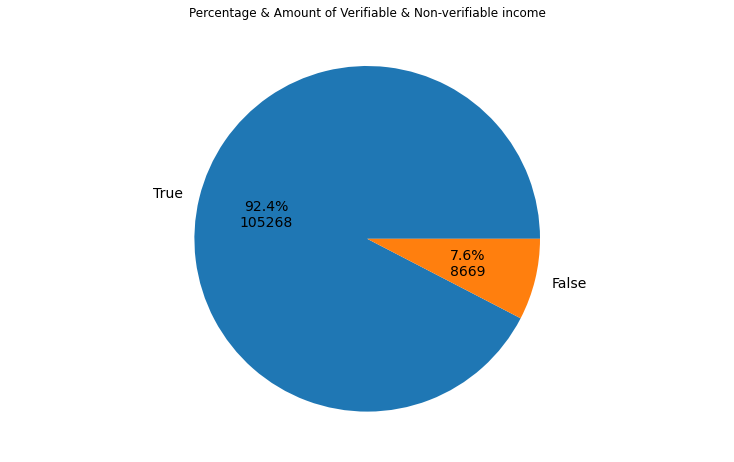

In [184]:
# visualize the pie chart
fig = plt.figure();
ax = fig.add_axes([0,0,1,1]);
ax.axis('equal')

ax.pie(pie_values, labels = pie_labels, autopct=autopct_format, textprops={'fontsize':14});
plt.title('Percentage & Amount of Verifiable & Non-verifiable income');
plt.show;

## 2.

In [185]:
df.head()

,status,loan_amount,months_spent,interest_rate,home_owner,dur_in_mnth,income_verifiable,monthly_income,investors,year_assigned
LoanNumber,,,,,,,,,,
1,Completed,1000,100,0.04,False,36,True,12500,1,2005
2,Completed,1000,100,0.17,False,36,True,10000,1,2005
3,Completed,2000,100,0.13,False,36,True,8333,2,2005
4,Completed,2500,100,0.25,False,36,True,29166,1,2005
5,Completed,1000,100,0.04,False,36,True,9166,3,2005


In [186]:
# Count of status
df.status.value_counts()

Current                   56576
Completed                 38074
Chargedoff                11992
Defaulted                  5018
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Cancelled                     5
Name: status, dtype: int64

In [187]:
# Splitting the status column to remove unneccesary inputs
df[['status','filtered']] = df['status'].str.split('(',expand = True)

In [188]:
df.head()

,status,loan_amount,months_spent,interest_rate,home_owner,dur_in_mnth,income_verifiable,monthly_income,investors,year_assigned,filtered
LoanNumber,,,,,,,,,,,
1,Completed,1000,100,0.04,False,36,True,12500,1,2005,None
2,Completed,1000,100,0.17,False,36,True,10000,1,2005,None
3,Completed,2000,100,0.13,False,36,True,8333,2,2005,None
4,Completed,2500,100,0.25,False,36,True,29166,1,2005,None
5,Completed,1000,100,0.04,False,36,True,9166,3,2005,None


In [189]:
# Dropping the unneccesary splitted column 'filtered' to clean up the dataframe
df = df.drop('filtered',axis = 1)

In [190]:
df.head()

,status,loan_amount,months_spent,interest_rate,home_owner,dur_in_mnth,income_verifiable,monthly_income,investors,year_assigned
LoanNumber,,,,,,,,,,
1,Completed,1000,100,0.04,False,36,True,12500,1,2005
2,Completed,1000,100,0.17,False,36,True,10000,1,2005
3,Completed,2000,100,0.13,False,36,True,8333,2,2005
4,Completed,2500,100,0.25,False,36,True,29166,1,2005
5,Completed,1000,100,0.04,False,36,True,9166,3,2005


In [191]:
# Count of status
df.status.value_counts()

Current                   56576
Completed                 38074
Chargedoff                11992
Defaulted                  5018
Past Due                   2067
FinalPaymentInProgress      205
Cancelled                     5
Name: status, dtype: int64

In [192]:
# Replacing 'FinalPaymentInProgress' with 'PaymentInProgress'
df.status = df.status.replace('FinalPaymentInProgress','PaymentInProgress')

In [193]:
df.status.value_counts()

Current              56576
Completed            38074
Chargedoff           11992
Defaulted             5018
Past Due              2067
PaymentInProgress      205
Cancelled                5
Name: status, dtype: int64

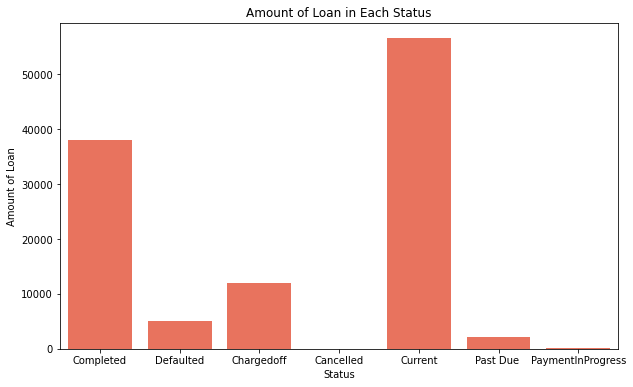

In [194]:
# Code for plotting the chart
sns.countplot(data=df, x= 'status', color = '#FF6347');
plt.title('Amount of Loan in Each Status');
plt.xlabel('Status');
plt.ylabel('Amount of Loan');
# Resizing the chart
plt.rcParams['figure.figsize'] = (10,6);


## 3

In [195]:
df.head()

,status,loan_amount,months_spent,interest_rate,home_owner,dur_in_mnth,income_verifiable,monthly_income,investors,year_assigned
LoanNumber,,,,,,,,,,
1,Completed,1000,100,0.04,False,36,True,12500,1,2005
2,Completed,1000,100,0.17,False,36,True,10000,1,2005
3,Completed,2000,100,0.13,False,36,True,8333,2,2005
4,Completed,2500,100,0.25,False,36,True,29166,1,2005
5,Completed,1000,100,0.04,False,36,True,9166,3,2005


In [196]:
# count of loans in year_assigned
df.year_assigned.value_counts()

2013    34345
2012    19553
2014    12172
2008    11552
2007    11460
2011    11228
2006     5906
2010     5652
2009     2047
2005       22
Name: year_assigned, dtype: int64

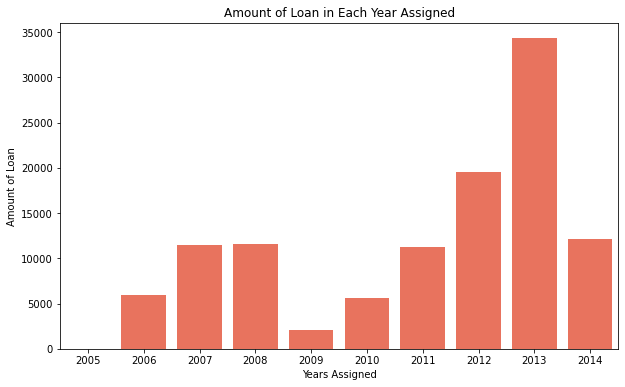

In [197]:
# Code for plotting the chart
sns.countplot(data=df, x= 'year_assigned', color = '#FF6347');
plt.title('Amount of Loan in Each Year Assigned');
plt.xlabel('Years Assigned');
plt.ylabel('Amount of Loan');
# Resizing the chart
plt.rcParams['figure.figsize'] = (10,6);

## Quantitative Univariate

## 4.

In [198]:
df.head()

,status,loan_amount,months_spent,interest_rate,home_owner,dur_in_mnth,income_verifiable,monthly_income,investors,year_assigned
LoanNumber,,,,,,,,,,
1,Completed,1000,100,0.04,False,36,True,12500,1,2005
2,Completed,1000,100,0.17,False,36,True,10000,1,2005
3,Completed,2000,100,0.13,False,36,True,8333,2,2005
4,Completed,2500,100,0.25,False,36,True,29166,1,2005
5,Completed,1000,100,0.04,False,36,True,9166,3,2005


In [199]:
# Count for the duration of mponth
new_df = df.dur_in_mnth.value_counts().rename_axis('Duration_in_Month').reset_index(name='Amount_of_Loans_by_Duration')
new_df

,Duration_in_Month,Amount_of_Loans_by_Duration
0,36,87778
1,60,24545
2,12,1614


In [200]:
counts_total = new_df.Amount_of_Loans_by_Duration.sum();
counts_total

113937

In [201]:
# To add the values with persentage, we have to do reverse calc using function
def autopct_format(perc_value):
    print(perc_value)
    return '{:.1f}%\n{:.0f}'.format(perc_value , counts_total*perc_value/100);

In [202]:
# set labels and values
pie_labels = new_df.Duration_in_Month
pie_values = new_df.Amount_of_Loans_by_Duration

77.04082131385803
21.542607247829437
1.4165722765028477


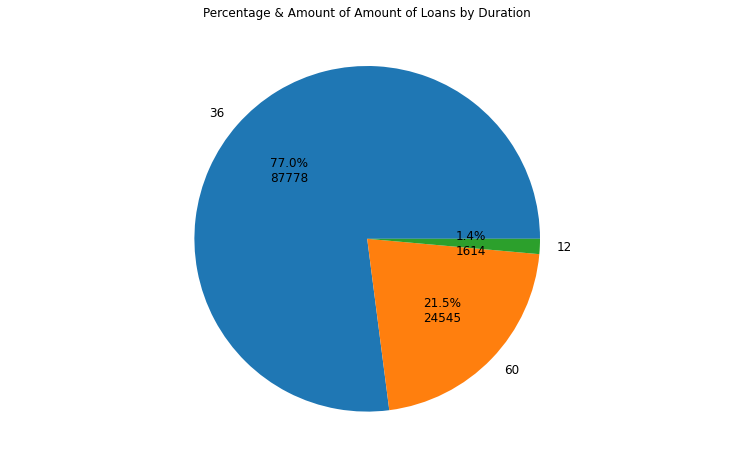

In [203]:
# visualize the pie chart
fig = plt.figure();
ax = fig.add_axes([0,0,1,1]);
ax.axis('equal')

ax.pie(pie_values, labels = pie_labels, autopct=autopct_format, textprops={'fontsize':12});
plt.title('Percentage & Amount of Amount of Loans by Duration');
plt.show;

# 5.

In [204]:
df.head()

,status,loan_amount,months_spent,interest_rate,home_owner,dur_in_mnth,income_verifiable,monthly_income,investors,year_assigned
LoanNumber,,,,,,,,,,
1,Completed,1000,100,0.04,False,36,True,12500,1,2005
2,Completed,1000,100,0.17,False,36,True,10000,1,2005
3,Completed,2000,100,0.13,False,36,True,8333,2,2005
4,Completed,2500,100,0.25,False,36,True,29166,1,2005
5,Completed,1000,100,0.04,False,36,True,9166,3,2005


In [205]:
# count of loans in year_assigned
df.interest_rate.value_counts()

0.14    6476
0.18    6371
0.16    5990
0.32    5925
0.15    5632
0.20    5591
0.12    5318
0.10    5083
0.17    4663
0.19    4586
0.13    4500
0.26    4284
0.11    3943
0.25    3912
0.22    3816
0.21    3800
0.08    3720
0.29    3702
0.23    3353
0.09    3342
0.27    3262
0.24    3161
0.31    2718
0.28    2525
0.35    2050
0.30    1896
0.07    1856
0.06    1053
0.33     629
0.34     545
0.05     129
0.36      40
0.04      21
0.01      13
0.00      12
0.03      10
0.45       3
0.50       2
0.40       2
0.48       1
0.38       1
0.02       1
Name: interest_rate, dtype: int64

In [206]:
## Testing for duplicate value in the index
df.index.duplicated()

array([False, False, False, ..., False, False, False])

In [207]:
## Dropping rows with duplicate values
df = df.loc[~df.index.duplicated(), :]

In [208]:
df

,status,loan_amount,months_spent,interest_rate,home_owner,dur_in_mnth,income_verifiable,monthly_income,investors,year_assigned
LoanNumber,,,,,,,,,,
1,Completed,1000,100,0.04,False,36,True,12500,1,2005
2,Completed,1000,100,0.17,False,36,True,10000,1,2005
3,Completed,2000,100,0.13,False,36,True,8333,2,2005
4,Completed,2500,100,0.25,False,36,True,29166,1,2005
5,Completed,1000,100,0.04,False,36,True,9166,3,2005
...,...,...,...,...,...,...,...,...,...,...
136474,Current,4000,0,0.26,False,60,True,2500,1,2014
136477,Current,2000,0,0.22,False,60,True,2333,1,2014
136480,Current,15000,0,0.09,False,36,True,6416,96,2014


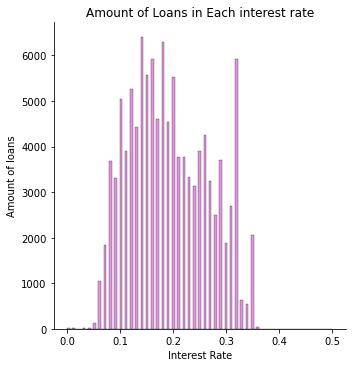

In [209]:
# plotting the chart for count of revolving_account
sns.displot(data=df, x= 'interest_rate', color = '#DA70D6');
plt.title('Amount of Loans in Each interest rate');
plt.xlabel('Interest Rate');
plt.ylabel('Amount of loans');
# Resizing the chart
plt.rcParams['figure.figsize'] = (15,6);

# Bivariate Exploration

## Two Quantitative Bivariate

## 6. 

In [210]:
df

,status,loan_amount,months_spent,interest_rate,home_owner,dur_in_mnth,income_verifiable,monthly_income,investors,year_assigned
LoanNumber,,,,,,,,,,
1,Completed,1000,100,0.04,False,36,True,12500,1,2005
2,Completed,1000,100,0.17,False,36,True,10000,1,2005
3,Completed,2000,100,0.13,False,36,True,8333,2,2005
4,Completed,2500,100,0.25,False,36,True,29166,1,2005
5,Completed,1000,100,0.04,False,36,True,9166,3,2005
...,...,...,...,...,...,...,...,...,...,...
136474,Current,4000,0,0.26,False,60,True,2500,1,2014
136477,Current,2000,0,0.22,False,60,True,2333,1,2014
136480,Current,15000,0,0.09,False,36,True,6416,96,2014


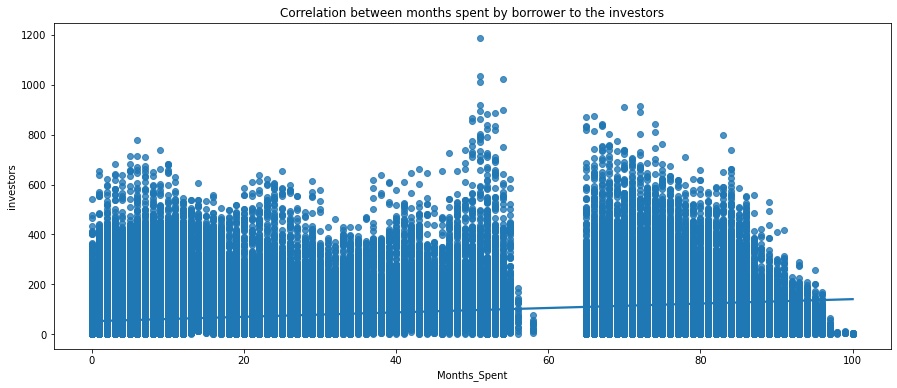

In [211]:
# scattered plot charts code for 'months_spent' & 'investors' correlation
sns.regplot(data=df, x='months_spent', y='investors');
plt.title('Correlation between months spent by borrower to the investors');
plt.xlabel('Months_Spent');
plt.ylabel('investors');

## 7.

In [212]:
df 

,status,loan_amount,months_spent,interest_rate,home_owner,dur_in_mnth,income_verifiable,monthly_income,investors,year_assigned
LoanNumber,,,,,,,,,,
1,Completed,1000,100,0.04,False,36,True,12500,1,2005
2,Completed,1000,100,0.17,False,36,True,10000,1,2005
3,Completed,2000,100,0.13,False,36,True,8333,2,2005
4,Completed,2500,100,0.25,False,36,True,29166,1,2005
5,Completed,1000,100,0.04,False,36,True,9166,3,2005
...,...,...,...,...,...,...,...,...,...,...
136474,Current,4000,0,0.26,False,60,True,2500,1,2014
136477,Current,2000,0,0.22,False,60,True,2333,1,2014
136480,Current,15000,0,0.09,False,36,True,6416,96,2014


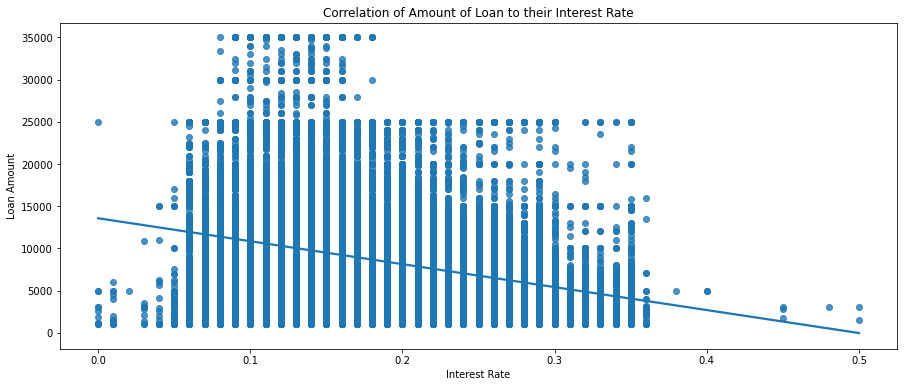

In [213]:
# scattered plot charts code for 'interest_rate' & 'loan_amount' correlation
sns.regplot(data=df, x='interest_rate', y='loan_amount');
plt.title('Correlation of Amount of Loan to their Interest Rate');
plt.xlabel('Interest Rate');
plt.ylabel('Loan Amount');

## Two Categorical Bivariate

## 8.

In [214]:
df

,status,loan_amount,months_spent,interest_rate,home_owner,dur_in_mnth,income_verifiable,monthly_income,investors,year_assigned
LoanNumber,,,,,,,,,,
1,Completed,1000,100,0.04,False,36,True,12500,1,2005
2,Completed,1000,100,0.17,False,36,True,10000,1,2005
3,Completed,2000,100,0.13,False,36,True,8333,2,2005
4,Completed,2500,100,0.25,False,36,True,29166,1,2005
5,Completed,1000,100,0.04,False,36,True,9166,3,2005
...,...,...,...,...,...,...,...,...,...,...
136474,Current,4000,0,0.26,False,60,True,2500,1,2014
136477,Current,2000,0,0.22,False,60,True,2333,1,2014
136480,Current,15000,0,0.09,False,36,True,6416,96,2014


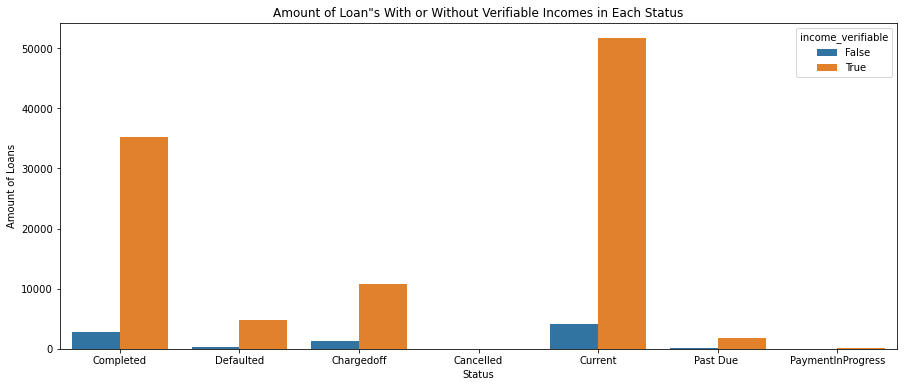

In [215]:
## Code for plotting a Categorical Bivariate Chart
sns.countplot(data=df, x='status', hue='income_verifiable');
plt.title('Amount of Loan"s With or Without Verifiable Incomes in Each Status');
plt.xlabel('Status');
plt.ylabel('Amount of Loans');

## 9.

In [216]:
df

,status,loan_amount,months_spent,interest_rate,home_owner,dur_in_mnth,income_verifiable,monthly_income,investors,year_assigned
LoanNumber,,,,,,,,,,
1,Completed,1000,100,0.04,False,36,True,12500,1,2005
2,Completed,1000,100,0.17,False,36,True,10000,1,2005
3,Completed,2000,100,0.13,False,36,True,8333,2,2005
4,Completed,2500,100,0.25,False,36,True,29166,1,2005
5,Completed,1000,100,0.04,False,36,True,9166,3,2005
...,...,...,...,...,...,...,...,...,...,...
136474,Current,4000,0,0.26,False,60,True,2500,1,2014
136477,Current,2000,0,0.22,False,60,True,2333,1,2014
136480,Current,15000,0,0.09,False,36,True,6416,96,2014


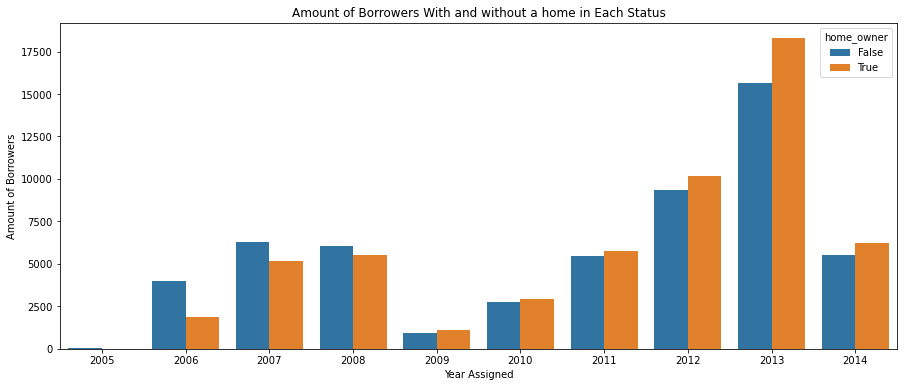

In [217]:
## Code for plotting a Categorical Bivariate Chart
sns.countplot(data=df, x='year_assigned', hue='home_owner');
plt.title('Amount of Borrowers With and without a home in Each Status');
plt.xlabel('Year Assigned');
plt.ylabel('Amount of Borrowers');

# Categorical And Quantitative Bivariate

## 10.

In [218]:
df

,status,loan_amount,months_spent,interest_rate,home_owner,dur_in_mnth,income_verifiable,monthly_income,investors,year_assigned
LoanNumber,,,,,,,,,,
1,Completed,1000,100,0.04,False,36,True,12500,1,2005
2,Completed,1000,100,0.17,False,36,True,10000,1,2005
3,Completed,2000,100,0.13,False,36,True,8333,2,2005
4,Completed,2500,100,0.25,False,36,True,29166,1,2005
5,Completed,1000,100,0.04,False,36,True,9166,3,2005
...,...,...,...,...,...,...,...,...,...,...
136474,Current,4000,0,0.26,False,60,True,2500,1,2014
136477,Current,2000,0,0.22,False,60,True,2333,1,2014
136480,Current,15000,0,0.09,False,36,True,6416,96,2014


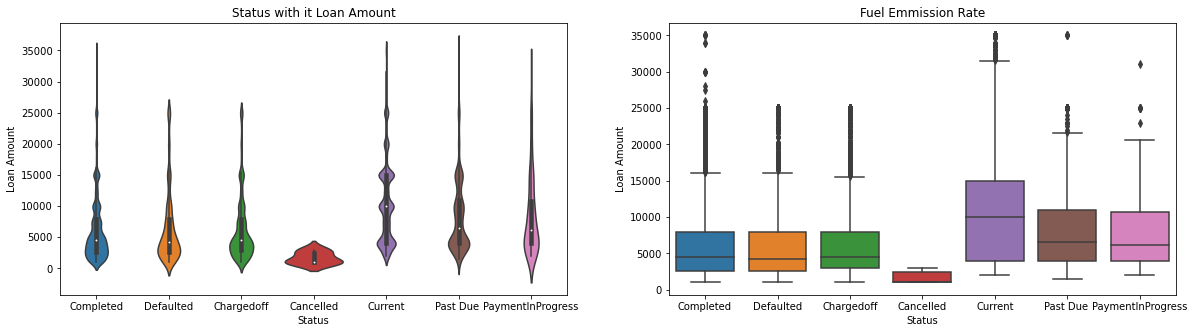

In [219]:
# assigning size to the chart
plt.figure(figsize=[20,5])
# plotting the voilinplot chart showing correlation between Loan Status and Loan Amount.
plt.subplot(1,2,1)
sns.violinplot(data=df, x='status', y='loan_amount');
plt.title('Status with it Loan Amount');
plt.xlabel('Status');
plt.ylabel('Loan Amount');
# plotting the boxplot chart showing correlation between Loan Status and Loan Amount.
plt.subplot(1,2,2)
sns.boxplot(data=df, x='status', y='loan_amount');
plt.title('Fuel Emmission Rate');
plt.xlabel('Status');
plt.ylabel('Loan Amount');


### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> From my first analysis above, i realise that the amount of borrowers with verifiable source of income are more than the <brk> ones without verifiable source of income. Also, another analysis of mine shows the most of the loans collected are <brk> on current status, amount of completed loans are second to the amount of current loans. Lastly, in one of my<brk>analysis, 2013 has the highest amount of assigned loans with 34,345 assigned loans.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> I obsserved showing the correlation between Loan Status and Loan amount<brk>, cancelled loans gathered the lowest loan amoumt.

## Conclusions
> Amount of borrowers with veriable source of income are more than the ones with non-verifiable source of income,<brk>
  this was found by simply finding the counts of borrowers in each conditions showing whether borrowers have a <brk> 
  verifiable source of income. 
